In [1]:
%matplotlib inline
import numpy as np
from covid_forecast import compute_and_plot, fit_q_and_forecast
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact, widgets
import data
import matplotlib.dates as mdates
import warnings
import csv
import matplotlib.dates as mdates
from covid_forecast import *
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
matplotlib.rcParams['figure.figsize'] = (10., 6.)

1. I  want to know the total number of deaths avoided from easiest starting date to do this  — to today. Thus realized data (not future projections).

In [6]:
def estimate_deaths_averted(region,beta,gamma,dthresh,dthresh_min,imult,undercount_factor,ifr_val):
    N = data.get_population(region)
    data_dates, cum_cases, cum_deaths = data.load_time_series(region)
    
    no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
        no_intervention_scenario(region,beta,gamma,undercount_factor,
                                 dthresh,dthresh_min,imult=imult,forecast_length=0,ifr_val=ifr_val)
    print(no_interv_dates[0])
    return no_interv_cum_deaths[-1]-cum_deaths[-1]*undercount_factor

In [13]:
betas = [0.25, 0.27, 0.29]
gammas = [0.06, 0.07, 0.08]
ifr_vals = ['mean','high','low']
dthresh = 20
dthresh_min = 20
imults = [8, 16, 20]
undercount_factors = [1.0, 1.5, 2.0]

In [14]:
#regions = ['China','Italy','Spain','US','France','United Kingdom','Korea, South','Germany']
regions = ['Argentina']
for region in regions:
    da_min = 1e99
    da_max = 0
    for beta in betas:
        for gamma in gammas:
            for ifr_val in ifr_vals:
                for imult in imults:
                    for undercount_factor in undercount_factors:
                        da = estimate_deaths_averted(region,beta,gamma,
                                                     dthresh,dthresh_min,imult,
                                                     undercount_factor,ifr_val)
                        #if (da < da_min) or (da>da_max):
                        #    print(beta,gamma,ifr_val,imult,undercount_factor,da)
                        da_min = min(da_min,da)
                        da_max = max(da_max,da)
    print('{:>25}: {:7.0f} {:7.0f}'.format(region, da_min, da_max))

2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00
2020-03-28 00:00:00
2020-04-01 00:00:00
2020-03-30 00:00:00


In [10]:
estimate_deaths_averted('Argentina',0.27,0.07,20,10,16,1.5,'mean')

2020-03-30 00:00:00


11728.642519969679

In [11]:
data_dates, cum_cases, cum_deaths = data.load_time_series('Argentina')

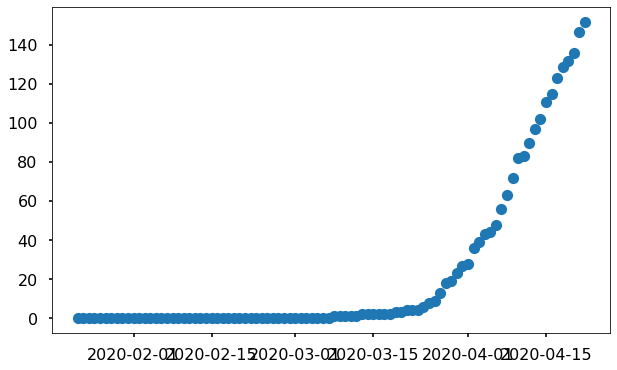

In [12]:
plt.plot_date(data_dates,cum_deaths)

In [15]:
beta = 0.27
gamma - 0.07
ifr_val = 'mean'
dthresh = 50
dthresh_min = 20
imult = 12
undercount_factor = 1.5

In [16]:
for region in regions:
    da = estimate_deaths_averted(region,beta,gamma,
                                 dthresh,dthresh_min,imult,
                                 undercount_factor,ifr_val)
    print('{:>25}: {:7.0f}'.format(region, da))

                    China: 8635354
                    Italy:  413913
                    Spain:  173285
                       US:  290729
                   France:  198386
           United Kingdom:  110129
             Korea, South:  101615
                  Germany:  100187


In [2]:
regions = list(data.population.keys())
ifr = default_ifr
gamma = default_gamma
beta = default_beta
totalpop = 0
saved = 0
adjusted_saved = 0
undercount_factor = 1.45
dthresh = 20
dthresh_min = 10
imult = 8

for region in regions:
    ifr = avg_ifr(region)
    N = data.get_population(region)
    data_dates, cum_cases, cum_deaths = data.load_time_series(region)

    dth = dthresh
    if cum_deaths[-1]<dthresh:
        if cum_deaths[-1]<dthresh_min: continue
        else: dth = dthresh_min
        
    
    totalpop += N
    
    past_dates, past_new_infections = get_past_infections(region,beta,gamma)

    no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
            no_intervention_scenario(region,dthresh=dth,imult=imult,forecast_length=0)
    start_date = datetime.strftime(no_interv_dates[0],"%m-%d")
    this_saved = no_interv_cum_deaths[-1]-cum_deaths[-1]
    this_adj_saved = no_interv_cum_deaths[-1] - cum_deaths[-1]*undercount_factor
    print('{:>25}: {:7.0f} {:7.0f} {:5.0f} {}'.format(region, 
                                                    this_saved, this_adj_saved, 
                                                    cum_deaths[-1], start_date))
    
    saved += this_saved
    adjusted_saved += this_adj_saved
    

print(saved, adjusted_saved, totalpop)

              Afghanistan:     157     140    36 04-13


Exception: 

In [5]:
print('Total lives saved to date: {:.0f}'.format(saved))
print('Accounting for {:.1f}% of world population'.format(totalpop/7.7e9*100))
undercount_factor = 1.454578788156568
print('Adjusted for undercounting: {:.0f}'.format(adjusted_saved))

Total lives saved to date: 9004375
Accounting for 83.8% of world population
Adjusted for undercounting: 8947617


In [10]:
undercount_factor = 1.45
dthresh = 50
dthresh_min = 10
imult = 8

regions = ['China','Italy','Spain','US','France','United Kingdom','Korea, South','Germany']
for region in regions:
    ifr = avg_ifr(region)
    N = data.get_population(region)
    data_dates, cum_cases, cum_deaths = data.load_time_series(region)
    dth = dthresh
    if cum_deaths[-1]<dthresh:
        if cum_deaths[-1]<dthresh_min: continue
        else: dth = dthresh_min
    if region == 'Korea, South':
        dth = 10
            
    past_dates, past_new_infections = get_past_infections(region,beta,gamma)

    no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
            no_intervention_scenario(region,dthresh=dth,imult=imult,
                                     undercount_factor=undercount_factor,
                                     forecast_length=0)
    start_date = datetime.strftime(no_interv_dates[0],"%m-%d")
    this_saved = no_interv_cum_deaths[-1]-cum_deaths[-1]
    this_adj_saved = no_interv_cum_deaths[-1] - cum_deaths[-1]*undercount_factor
    print('{:>25}: {:7.0f} {:7.0f} {:5.0f} {}'.format(region, 
                                                    this_saved, this_adj_saved, 
                                                    cum_deaths[-1], start_date))
    
    saved += this_saved
    adjusted_saved += this_adj_saved

                    China: 8133682 8132177  3345 01-25
                    Italy:  290880  281400 21067 03-02
                    Spain:   76723   68598 18056 03-10
                       US:   91953   80329 25832 03-11
                   France:   98536   91449 15748 03-11
           United Kingdom:   47608   42150 12129 03-16
             Korea, South:   85380   85280   222 02-24
                  Germany:   26561   25079  3294 03-19


In [23]:
excess_mort_spain = [1273-1154, 1348-1153, 1416-1150, 1564-1148.5, 
                     1727-1147.75, 1817-1143.5, 1718-1141.5, 1913-1137.5, 
                     2152-1125.5, 2240-1128.25, 2263-1125, 2390-1121.5, 
                     2408-1121.5, 2216-1121.5, 2328-1121.5, 2476-1118.5, 
                     2439-1115.5, 2369-1109.5, 2303-1108]


In [24]:
data_dates, cum_cases, cum_deaths = data.load_time_series('Spain')
print(data_dates[-31:-12])

DatetimeIndex(['2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04'],
              dtype='datetime64[ns]', freq='D')


In [29]:
len(excess_mort_spain)

19

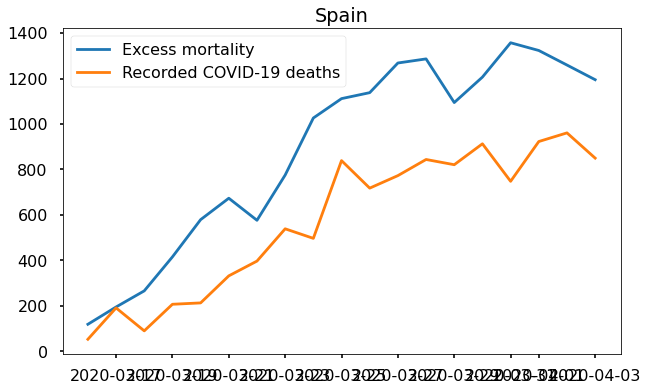

In [28]:
offset = -13 # days from today to April 3rd
plt.plot_date(data_dates[offset-19:offset],excess_mort_spain,'-')
plt.plot_date(data_dates[offset-19:offset],np.diff(cum_deaths)[offset-19:offset],'-')
plt.legend(['Excess mortality','Recorded COVID-19 deaths'])
plt.title('Spain');

In [30]:
print(np.sum(excess_mort_spain)/np.sum(np.diff(cum_deaths)[offset-len(excess_mort_spain):offset]))

1.5462462187184893


In [20]:
np.sum(excess_mort_spain)

16632.0

In [22]:
cum_deaths[-12]

11947

In [10]:
cum_deaths[-1]

18708

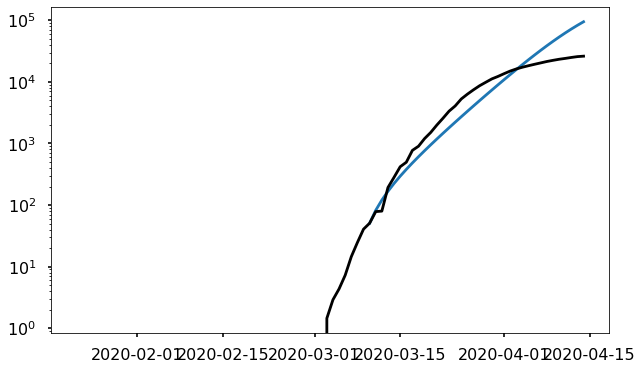

In [14]:
region='Spain'
dthresh=50
imult=8
plotfun = plt.semilogy
ifr = avg_ifr(region)

#plotfun = plt.plot_date

no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
    no_intervention_scenario(region,forecast_length=0,undercount_factor=1.,
                             dthresh=dthresh,imult=imult)

#plotfun(no_interv_dates,no_interv_cum_deaths,'-')

no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
    no_intervention_scenario(region,forecast_length=0,undercount_factor=1.45,
                             dthresh=dthresh,imult=imult)

plotfun(no_interv_dates,no_interv_cum_deaths,'-')

data_dates, cum_cases, cum_deaths = data.load_time_series(region)

#plotfun(data_dates,cum_deaths,'-k')
plotfun(data_dates,cum_deaths*1.45,'-k')

In [55]:
np.diff(cum_deaths)[-3:]

array([619, 431, 566])

In [56]:
data_dates[-3:]

DatetimeIndex(['2020-04-11', '2020-04-12', '2020-04-13'], dtype='datetime64[ns]', freq='D')

Estimated lives saved as of March 31, for comparison with IC report Table 2 (page 10).

In [43]:
dthresh=20
imult=8
dthresh_min=10
for region in ['Austria','Belgium','Denmark','France','Germany','Italy',
               'Norway','Spain','Sweden','Switzerland','United Kingdom']:

    data_dates, total_cases, cum_deaths = data.load_time_series(region)
    dth = dthresh
    if cum_deaths[-1]<dthresh:
        if cum_deaths[-1]<dthresh_min: continue
        else: dth = dthresh_min
    
    if region=='Spain': im = 25
    else: im = 8
    no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
        no_intervention_scenario(region,forecast_length=0,undercount_factor=1.45,
                                 dthresh=dthresh,imult=im)
    print('{} {:.0f}'.format(region,no_interv_cum_deaths[-15]))

Austria 346
Belgium 709
Denmark 409
France 7229
Germany 1328
Italy 37704
Norway 151
Spain 17870
Sweden 532
Switzerland 1273
United Kingdom 2453


In [41]:
cum_deaths[-1]

3

In [42]:
region

'United Kingdom'

In [10]:
no_interv_dates[-15]

Timestamp('2020-03-31 00:00:00', freq='D')

2020-04-14 00:00:00 2020-04-15 00:00:00


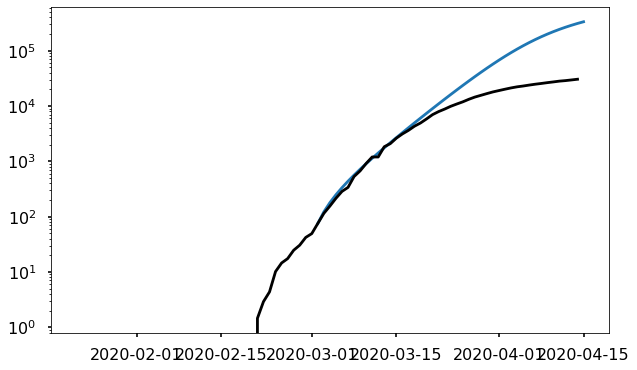

In [22]:
region='Italy'
dthresh=50
imult=8
plotfun = plt.semilogy
#plotfun = plt.plot_date

no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
    no_intervention_scenario(region,forecast_length=0,undercount_factor=1.,
                             dthresh=dthresh,imult=imult)

#plotfun(no_interv_dates,no_interv_cum_deaths,'-')

no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
    no_intervention_scenario(region,forecast_length=0,undercount_factor=1.45,
                             dthresh=dthresh,imult=imult)

plotfun(no_interv_dates,no_interv_cum_deaths,'-')

data_dates, cum_cases, cum_deaths = data.load_time_series(region)

#plotfun(data_dates,cum_deaths,'-k')
plotfun(data_dates,cum_deaths*1.45,'-k')
print(data_dates[-1],no_interv_dates[-1])

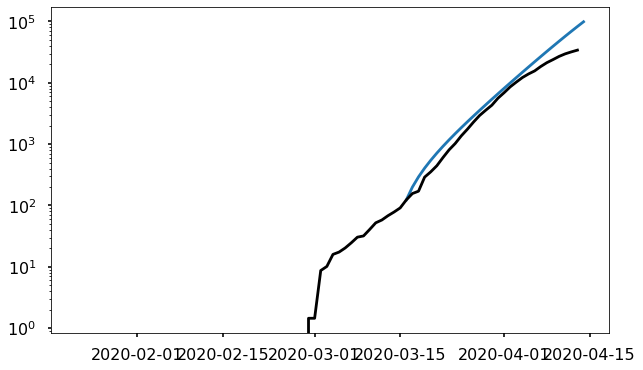

In [17]:
region='US'
dthresh=100
imult=8
plotfun = plt.semilogy
#plotfun = plt.plot_date

no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
    no_intervention_scenario(region,forecast_length=0,undercount_factor=1.,
                             dthresh=dthresh,imult=imult)

#plotfun(no_interv_dates,no_interv_cum_deaths,'-')

no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
    no_intervention_scenario(region,forecast_length=0,undercount_factor=1.45,
                             dthresh=dthresh,imult=imult)

plotfun(no_interv_dates,no_interv_cum_deaths,'-')

data_dates, cum_cases, cum_deaths = data.load_time_series(region)

#plotfun(data_dates,cum_deaths,'-k')
plotfun(data_dates,cum_deaths*1.45,'-k')

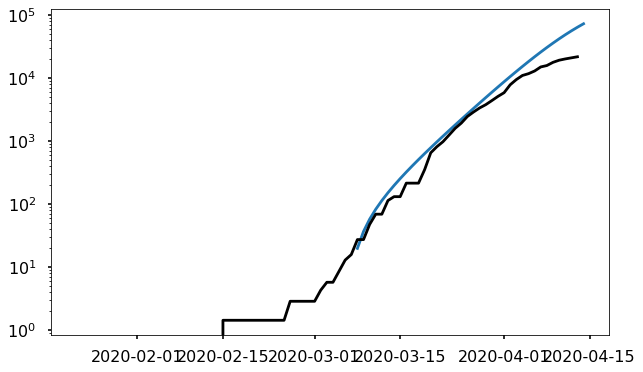

In [8]:
region='France'
dthresh=20
imult=8
plotfun = plt.semilogy
#plotfun = plt.plot_date

no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
    no_intervention_scenario(region,forecast_length=0,undercount_factor=1.,
                             dthresh=dthresh,imult=imult)

#plotfun(no_interv_dates,no_interv_cum_deaths,'-')

no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
    no_intervention_scenario(region,forecast_length=0,undercount_factor=1.45,
                             dthresh=dthresh,imult=imult)

plotfun(no_interv_dates,no_interv_cum_deaths,'-')

data_dates, cum_cases, cum_deaths = data.load_time_series(region)

#plotfun(data_dates,cum_deaths,'-k')
plotfun(data_dates,cum_deaths*1.45,'-k')

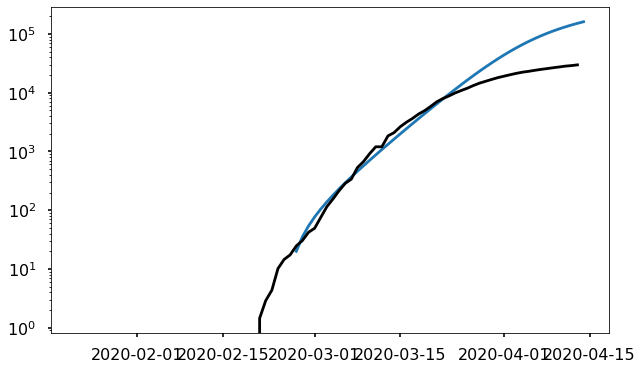

In [9]:
region='Italy'
dthresh=20
imult=8
plotfun = plt.semilogy
#plotfun = plt.plot_date

no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
    no_intervention_scenario(region,forecast_length=0,undercount_factor=1.,
                             dthresh=dthresh,imult=imult)

#plotfun(no_interv_dates,no_interv_cum_deaths,'-')

no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
    no_intervention_scenario(region,forecast_length=0,undercount_factor=1.45,
                             dthresh=dthresh,imult=imult)

plotfun(no_interv_dates,no_interv_cum_deaths,'-')

data_dates, cum_cases, cum_deaths = data.load_time_series(region)

#plotfun(data_dates,cum_deaths,'-k')
plotfun(data_dates,cum_deaths*1.45,'-k')

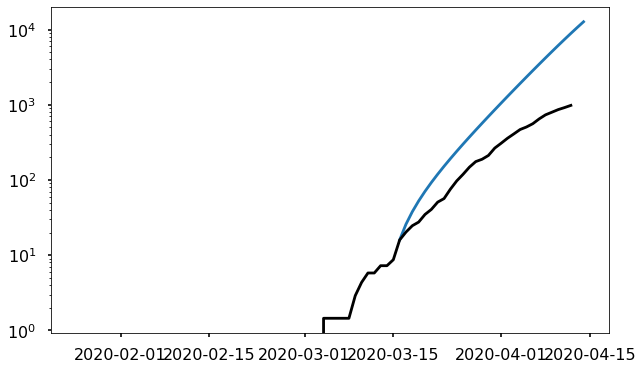

In [20]:
region='California'
dthresh=10
imult=8
plotfun = plt.semilogy
#plotfun = plt.plot_date

no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
    no_intervention_scenario(region,forecast_length=0,undercount_factor=1.,
                             dthresh=dthresh,imult=imult)

#plotfun(no_interv_dates,no_interv_cum_deaths,'-')

no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
    no_intervention_scenario(region,forecast_length=0,undercount_factor=1.45,
                             dthresh=dthresh,imult=imult)

plotfun(no_interv_dates,no_interv_cum_deaths,'-')

data_dates, cum_cases, cum_deaths = data.load_time_series(region)

#plotfun(data_dates,cum_deaths,'-k')
plotfun(data_dates,cum_deaths*1.45,'-k')

In [30]:
regions = list(data.US_state_population.keys())
ifr = default_ifr
gamma = default_gamma
beta = default_beta
totalpop = 0
saved = 0
adjusted_saved = 0
undercount_factor = 1.45
dthresh = 20
dthresh_min = 10
imult = 8

for region in regions:
    N = data.get_population(region)
    data_dates, cum_cases, cum_deaths = data.load_time_series(region)

    dth = dthresh
    if cum_deaths[-1]<dthresh:
        if cum_deaths[-1]<dthresh_min: continue
        else: dth = dthresh_min
        
    
    totalpop += N
    
    past_dates, past_new_infections = get_past_infections(region,ifr,beta,gamma)

    no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
            no_intervention_scenario(region,dthresh=dth,imult=imult,forecast_length=0)
    this_saved = no_interv_cum_deaths[-3]-cum_deaths[-1]
    this_adj_saved = no_interv_cum_deaths[-3] - cum_deaths[-1]*undercount_factor
    print('{}: {:.0f} {:.0f} {:.0f}'.format(region, this_saved, this_adj_saved, cum_deaths[-1]))
    
    saved += this_saved
    adjusted_saved += this_adj_saved
    

print(saved, adjusted_saved, totalpop)

Alabama: 774 732 93
Arizona: 1224 1172 117
Arkansas: 211 199 27
California: 8534 8230 676
Colorado: 2025 1895 290
Connecticut: 1566 1317 554
Delaware: 242 226 35
District of Columbia: 233 211 50
Florida: 3184 2977 460
Georgia: 3208 3011 438
Idaho: 95 83 27
Illinois: 1880 1553 727
Indiana: 1472 1317 343
Iowa: 243 224 41
Kansas: 309 284 56
Kentucky: 607 563 98
Louisiana: 2803 2425 840
Maine: 204 196 19
Maryland: 504 398 236
Massachusetts: 1178 837 756
Michigan: 1567 899 1486
Minnesota: 481 450 70
Mississippi: 706 663 96
Missouri: 489 437 116
Nebraska: 117 109 18
Nevada: 854 803 113
New Hampshire: 84 74 23
New Jersey: 1875 818 2350
New Mexico: 72 61 26
New York: 468 -3755 9385
North Carolina: 367 328 86
Ohio: 1421 1307 253
Oklahoma: 960 917 96
Oregon: 717 694 52
Pennsylvania: 1262 1025 525
Rhode Island: 216 188 63
South Carolina: 999 962 82
Tennessee: 629 581 107
Texas: 2106 1976 289
Utah: 213 205 18
Vermont: 389 376 27
Virginia: 1398 1335 141
Washington: 18628 18398 511
Wisconsin: 1251 1

In [31]:
data_dates[-1]

Timestamp('2020-04-12 00:00:00', freq='D')

In [32]:
no_interv_dates[-3]

Timestamp('2020-04-12 00:00:00', freq='D')

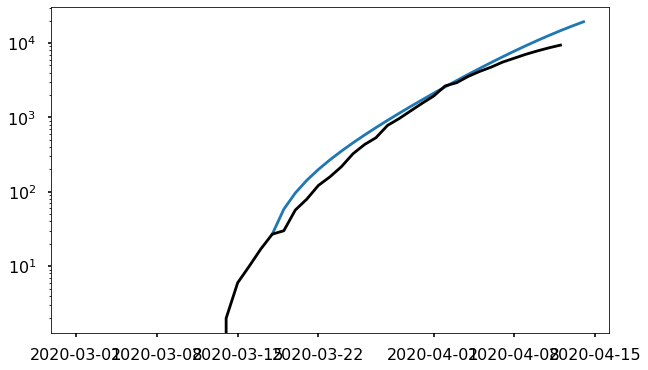

In [5]:
region='New York'
dthresh=20
imult=15
plotfun = plt.semilogy
#plotfun = plt.plot_date

no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
    no_intervention_scenario(region,forecast_length=0,undercount_factor=1.,
                             dthresh=dthresh,imult=imult)

plotfun(no_interv_dates,no_interv_cum_deaths,'-')

no_interv_dates, no_interv_cum_deaths, no_interv_new_infections = \
    no_intervention_scenario(region,forecast_length=0,undercount_factor=1.45,
                             dthresh=dthresh,imult=imult)

#plotfun(no_interv_dates,no_interv_cum_deaths,'-')

data_dates, cum_cases, cum_deaths = data.load_time_series(region)

plotfun(data_dates,cum_deaths,'-k')
#plotfun(data_dates,cum_deaths*1.45,'-k')

In [26]:
data_dates[-1]

Timestamp('2020-04-12 00:00:00', freq='D')

In [27]:
no_interv_dates[-1]

Timestamp('2020-04-14 00:00:00', freq='D')